<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

- Graph primitives:
    - `Vertex`: implements a vertex object. Stores position of a given vertex (or vertices) as `1x2` `torch.tensor`, and implements methods for interacting with `torch` autograd. Compatible with D-dimensional `NxD` `torch.tensor`.
    - `Graph`: implements graph object. Stores vertices (`Vertex` object with `NxD` `torch.tensor`), edges (`Nx2` integer array of vertex indices) connecting the vertices, and implements methods for interacting with `torch` autograd.
- Cell monolayer representations: 
    - `Monolayer`: Implements cell monolayer, such as (2-dimensional) apical plane of an epithelial tissue. Inherits from `Graph` class. [__needs docs__]
        - `Graph` and `Monolayer` have "to", and "device" methods.
- to-do:
    - extend `VoronoiRegions2Edges` to add out-of-diagram vertices as boundary vertices (or partial cells)
    - need to add tranfer to GPU and back

## Helper functions for Graphs
---

In [0]:
#| echo: false
#| output: asis
show_doc(plot_graph)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L14){target="_blank" style="float:right; font-size:smaller"}

### plot_graph

>      plot_graph (Xv, edges, plot_arg=['g-', 'mo'], alphas=[0.2, 0.5])

*A function for plotting simple graphs (slow for large graphs)
- `Xv`: vertex locations
- `edges`: graph edges as indices of the vertex pairs that form.
Nx2 array of integers (could be list of lists)*

In [0]:
#| echo: false
#| output: asis
show_doc(plot_graph_as_quiver)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L27){target="_blank" style="float:right; font-size:smaller"}

### plot_graph_as_quiver

>      plot_graph_as_quiver (g, quiver_kwargs={'units': 'xy', 'angles': 'xy',
>                            'scale_units': 'xy', 'scale': 1.0, 'headwidth': 0,
>                            'headlength': 0, 'width': 0.05, 'color': 'g'},
>                            return_Q=False)

*Plot [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) or [`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) object edges.*

In [0]:
#| echo: false
#| output: asis
show_doc(graph2networkx_with_pos)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L41){target="_blank" style="float:right; font-size:smaller"}

### graph2networkx_with_pos

>      graph2networkx_with_pos (g)

*Convert [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) or [`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) object to a `networkx.Graph` undirected graph object.*

## Helper functions for Monolayer
---

In [0]:
#| echo: false
#| output: asis
show_doc(is_in_edges_)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L48){target="_blank" style="float:right; font-size:smaller"}

### is_in_edges_

>      is_in_edges_ (e, edge_list)

*Returns edge index in the list, "-" means in reversed order, False if not found. 
Used by [`VoronoiRegions2Edges`](https://mshagirov.github.io/vertex_simulation/primitives.html#voronoiregions2edges)*

Slowest part of [`VoronoiRegions2Edges`](https://mshagirov.github.io/vertex_simulation/primitives.html#voronoiregions2edges) is checking whether the edge is in the list of edges, [`is_in_edges_()`](https://mshagirov.github.io/vertex_simulation/primitives.html#is_in_edges_) function. In [`is_in_edges_`](https://mshagirov.github.io/vertex_simulation/primitives.html#is_in_edges_) most of the time is spent for the `if, elif` conditionals (using `np` binary indexing in [`is_in_edges_`](https://mshagirov.github.io/vertex_simulation/primitives.html#is_in_edges_) didn't speed up finding regions, actually it slowed it down), need to change how [`VoronoiRegions2Edges`](https://mshagirov.github.io/vertex_simulation/primitives.html#voronoiregions2edges) works in particular adding edges to list (or need to even avoid it).

In [0]:
#| echo: false
#| output: asis
show_doc(VoronoiRegions2Edges)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L60){target="_blank" style="float:right; font-size:smaller"}

### VoronoiRegions2Edges

>      VoronoiRegions2Edges (regions)

*Converts Voronoi region vertex indices, like the one obtained from `scipy.spatial.Voronoi`, 
to a list of (*undirected*) edges (indices of vertex pairs).

Edges [i,j] and [j,i] are considered to be the same edge, and stored as one of these 
representations e.g. [j,i], but not both (i.e. no duplicate edges). Note that edge indexing in
`cells` starts from 1 (not 0!). Thus, when reading cell edges from `edge_list` you need to 
substract 1 from (absolute value of) these indices.

Usage:
- `edge_list,cells = VoronoiRegions2Edges(vrn_regions)`

Arg-s:
- `regions` is a list of lists, empty regions, or regions with out-of-diagram vertices ("-1") are ignored

Returns:
- `edge_list` : list of edges of an undirected graph.
- `cells`: dictionary of cells (Voronoi regions), keys: cell numbers, values: list of 
**edge indices starting from 1**. Negative indices indicate reversed order for vertices 
(together these edges form a closed region--a cell). Use `np.sign(cells[c])` to find reversed edges.*

In [ ]:
#| include: false
# %load_ext line_profiler
# v_x,regions =unit_hexagons(5,7)
# %lprun -f is_in_edges_ VoronoiRegions2Edges(regions)

## Graph primitives

In [0]:
#| echo: false
#| output: asis
show_doc(Vertex)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L100){target="_blank" style="float:right; font-size:smaller"}

### Vertex

>      Vertex (location=None, **kwargs)

*Implements vertex and stores vertex position(s) as Nx2 (or any 2-D tensor) `torch.Tensor`:(x,y,...)'s.
Rows represent points, columns the spatial dimensions, i.e. `[[x1,y1], [x2,y2], ...,[xN,yN]]`

- Methods:
    - `dist(self,other)` : calculates Euclidean distance between two points (each row).
    - `zero_grad_(self)` : set all gradients to zero (used during gradient descent at each iter-n step).
    - `grad(self)` : get gradient w.r.t. each tensor in `self.x`
    - `requires_grad_(self,val)`: sets `torch.tensor` flag inplace
    - `requires_grad(self)`: returns `torch.tensor` flag
- Properties :
    - `x` : use it to set/get location torch.tensor (returns or modifies self.x) [<a name="Vertex.x">Vertex.x</a>]*

---
Define vertices with Nx2 (or NxD in general, N:number of vertices, D: number of spatial dimesions) torch tensors:

In [ ]:
# initialise and then set vertex location 
o=Vertex()
o.x=torch.tensor([0.,0.], dtype=torch.float32)

# or with location at init-n
v1=Vertex([[1.,1.]],dtype=torch.float32)

# you can transfer "v1" and "o" to GPU
print(f'v1: {v1.device()}\n',f'o : {o.device()}')
if torch.cuda.device_count():
    v1.to_('cuda')
    o.to_(v1.device())
print(f'CUDA devices found: {torch.cuda.device_count()}\n',
      f'v1: {v1.device()}\n',f'o : {o.device()}')

# calculate distance between vertices
r = o.dist(v1)
print(f"Distance between two vertices (o <--> v1) : {r.squeeze()}")

v1: cpu
 o : cpu
CUDA devices found: 0
 v1: cpu
 o : cpu
Distance between two vertices (o <--> v1) : 1.4142135381698608


---

In [0]:
#| echo: false
#| output: asis
show_doc(Graph)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L178){target="_blank" style="float:right; font-size:smaller"}

### Graph

>      Graph (vertices=None, edges=None, fixed=None)

*Implements graph object. Stores vertices and edges. 
- Methods:
    - `length(self)` : calculates (Euclidean) edge lengths for each edge in the graph.
    - `direction(self)`: calculates edge vectors (`second_vertex - first_vertex` positions)
    - `get_vertex_grad(self)`: returns accumulated gradients w.r.t. to vertex positions.
    - `set_zero_grad_(self)`: sets gradients w.r.t. to vertex positions to zeros.
- Properties :
    - `vertices` : variable vertices represented by [`Vertex`](https://mshagirov.github.io/vertex_simulation/primitives.html#vertex) object (needs autograd).
    - `edges` : edges connecting vertices.Nx2 array of integers (vertex indices).
    Can be any `torch.tensor` compatible array with `tolist()` method (doesn't need autograd).
    - `fixed`: [__not yet implemented__] stores information about constant/fixed vertices (for setting boundary).
    Provided for convenience, turn off gradient calculation separately from "variable" vertices to keep them constant.*

---

When initializing [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) objects provide vertices (as [`Vertex`](https://mshagirov.github.io/vertex_simulation/primitives.html#vertex) object) and edges (connected vertex indices) at initialization, or set it later with `self.vertices` and `self.edges` property setters.

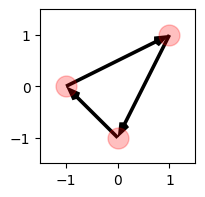

In [ ]:
g = Graph(vertices = Vertex([[1,1],[0,-1],[-1,0]], dtype=torch.float64, requires_grad=True),
          edges = torch.tensor([[0,1],[1,2],[2,0]]) )

# Plot vertex positions
plt.figure(figsize=[2,2])
plt.plot(g.vertices.x.detach()[:,0], g.vertices.x.detach()[:,1],'ro',ms=15,alpha=.25);# this plots all vertices
# plot directed edges to check them, to calculate direction use `direction()` function in Graph object
quiver_kwargs = {'units':'xy','angles':'xy','scale_units':'xy',
                 'scale':1.0,'headwidth':3,'headlength':4,'width':.07}
plot_graph_as_quiver(g,quiver_kwargs=quiver_kwargs) #plot edges with directions
plt.axis([-1.5,1.5,-1.5,1.5]);plt.axis(True)
plt.show()

Use `device()` and `to_()` to check device and move [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) tensors (vertices and edges) to GPU

In [ ]:
print(g.device())
if torch.cuda.device_count():
    g.to_('cuda')
    print(g.device())

{'vertices': device(type='cpu'), 'edges': device(type='cpu')}


Evaluating functions that depend on vertex positions (edge Euclidean length, and direction functions are already implemented in [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) class)
- Example below illustrates how to compute spatial gradient $\frac{\partial E}{\partial x_i}$ for $E(\{x_i\})=\sum_{edges}l_{ij}^2$ for vertices shown in the graph above. In a more general case, you can use vertex positions using `g.vertices.x` of a [`Vertex`](https://mshagirov.github.io/vertex_simulation/primitives.html#vertex) object, and check gradient tag with `g.vertices.requires_grad()` and enable gradient tracking inplace with `g.vertices.requires_grad_(True)`.

In [ ]:
# do something with vertex positions
l = g.length() # edge lengths
E = torch.sum(l**2) # some function that returns a scalar

# compute gradients w.r.t. variables of E 
E.backward()

# copying grad-s into dEdx as a list
dEdx=g.get_vertex_grad().tolist()

# reset gradients to zeros (useful for iterative calculations s.a. gradient descent)
g.set_zero_grad_()
dEdx_2=g.get_vertex_grad().tolist()
print(f'dEdx={dEdx}\n---\nafter zeroing gradients\ndEdx={dEdx_2}')

dEdx=[[6.0, 6.0], [0.0, -6.0], [-6.0, 0.0]]
---
after zeroing gradients
dEdx=[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


## Cell monolayer representations

In [0]:
#| echo: false
#| output: asis
show_doc(Monolayer)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L263){target="_blank" style="float:right; font-size:smaller"}

### Monolayer

>      Monolayer (vertices=None, edges=None, cells=None, fixed=None)

*Implements 2-dimensional cell monolayer (apical plane) represented by vertices and edges.

[`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) inherits *all methods, and properties* of [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph)

- Methods:
    - `perimeter(self)` : calculates cell perimeters. Returns `torch.tensor`.
    - `area(self)` : calculates cell areas (2-d polygons). Returns `torch.tensor`.
    [<a name="Monolayer.area">Monolayer.area</a>]
- Properties:
    - `cells` : dictionary of lists, with cell numbers (keys) and list of 
**edge indices starting from 1** (values). Negative indices indicate reversed order for vertices 
(cell is defined as a closed region formed by edges connected end-to-end).
Use `np.sign(cells[c])` to find reversed edges for cell `c`.*

---

* [`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) assumes that cells are 2D *simple polygons*. For a *simple polygon* with $n$ sides, [`Monolayer.area`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer.area) implements a [*shoelace formula*](https://en.wikipedia.org/wiki/Shoelace_formula):
$$A_{polygon} = \frac{1}{2}\left|{\sum^{n-1}_{i=1}x_{i}y_{i+1} + x_ny_1 - \sum^{n-1}_{i=1}x_{i+1}y_{i} - x_1 y_n}\right|$$
$$ = \frac{1}{2}\left|x_1y_2+x_2y_3+\dots+x_{n-1}y_n +x_ny_1 - x_2y_1-x_3y_2-\dots-x_ny_{n-1}-x_1y_n\right|$$

* You can use [`Graph`](https://mshagirov.github.io/vertex_simulation/primitives.html#graph) functions `to_()` and `device()` to move tensors to GPU and check tensor's device

m is on : {'vertices': device(type='cpu'), 'edges': device(type='cpu')}
Perimeter= tensor([[3.4142]]) ; Area= tensor([0.5000])


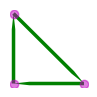

In [ ]:
# triangle shaped cell:
v = Vertex([[-.5,-.1],[-.5,.9],[.5,-.1]])
edges = torch.tensor([[0,1],[1,2],[2,0]])
tri_cells = {0:[1,2,3]}
m = Monolayer(vertices=v,edges=edges,cells=tri_cells)
print('m is on :', m.device())
print('Perimeter=',m.perimeter(),'; Area=',m.area())

# plot monolayer graph
plt.figure(figsize=[1,1])
plot_graph_as_quiver(m)
plt.plot(m.vertices.x[:,0],m.vertices.x[:,1],'mo',alpha=.5);

Note that we need to remember to copy tensors to CPU (and detach from the Pytorch's computational graph) to be able to use `matplotlib`

In [ ]:
# Now let's do the same computation on GPU (if available)
if torch.cuda.device_count():
    m.to_('cuda')
    print('m is on :', m.device())
    print('Perimeter=',m.perimeter(),'; Area=',m.area())

    # plot monolayer graph
    plt.figure(figsize=[1,1])
    plot_graph_as_quiver(m)
    plt.plot(m.vertices.x[:,0].cpu(),m.vertices.x[:,1].cpu(),'mo',alpha=.5);

In [ ]:
v_seeds=np.array([[np.sqrt(3)/2,5.5], [1.5*np.sqrt(3),5.5], [0.,4.],
                  [np.sqrt(3),4.],[2*np.sqrt(3),4.],[-np.sqrt(3)/2,2.5],
                  [np.sqrt(3)/2,2.5],[1.5*np.sqrt(3),2.5],[2.5*np.sqrt(3),2.5],
                  [0.,1.],[2*np.sqrt(3),1.], [np.sqrt(3),1.]])

vrn = Voronoi(v_seeds)
edge_list,hex_cells = VoronoiRegions2Edges(vrn.regions) # convert regions to edges and cells

Perimeter= tensor([6., 6., 6.], dtype=torch.float64) ;
Area= tensor([2.5981, 2.5981, 2.5981], dtype=torch.float64)


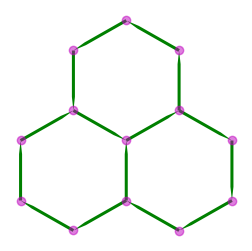

In [ ]:
verts = Vertex(vrn.vertices)
edges = torch.tensor(edge_list)

cell_graph = Monolayer(vertices=Vertex(vrn.vertices.copy()), edges=edges, cells=hex_cells)
# cell_graph.vertices.requires_grad_(True) #<-- use for enabling gradient calculations
print('Perimeter=',cell_graph.perimeter().squeeze(),';\nArea=',cell_graph.area())
# plot monolayer graph
plt.figure(figsize=[3,3])
plot_graph_as_quiver(cell_graph)
plt.plot(cell_graph.vertices.x[:,0],cell_graph.vertices.x[:,1],'mo',alpha=.5);

## Lattice Generator and Helper functions

In [0]:
#| echo: false
#| output: asis
show_doc(mask2vrn_region)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L334){target="_blank" style="float:right; font-size:smaller"}

### mask2vrn_region

>      mask2vrn_region (verts, vrn_regions, row_mask)

*Apply mask to Voronoi regions and vertices and re-label them.

In addition to the `row_mask` (for vertices), also removes empty regions
and regions with "-1" Voronoi vertices.

Arg-s:
- `verts` : Voronoi vertex locations (`numpy` array).
- `vrn_regions`: Voronoi regions ("cells"). Empty regions and
out-of-diagram Voronoi regions with "-1" vertices are removed.
- `row_mask`: 1-d binary mask for `verts` rows.

Returns:
- `v_x` : vertices after applying the mask (`=verts[row_mask,:]`)
- `regions`: re-labelled regions (with updated vertex indices)*

In [0]:
#| echo: false
#| output: asis
show_doc(unit_hex_seeds)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L360){target="_blank" style="float:right; font-size:smaller"}

### unit_hex_seeds

>      unit_hex_seeds (Sx, Sy)

*Produces seed locations for Voronoi such that Voronoi regions 
form rectangle of hexagonal cells with unit side length (==1).

Arg-s:
- `Sx`, `Sy`: width (x-axis) and height (y-axis) in cells (assumes that both $S_{x,y}>0$)

Returns:
- `numpy` array with `Sx`x`Sy` rows and 2 columns.*

In [0]:
#| echo: false
#| output: asis
show_doc(unit_hexagons)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L378){target="_blank" style="float:right; font-size:smaller"}

### unit_hexagons

>      unit_hexagons (Ny, Nx)

*Produces Ny rows-by-Nx columns of hexagons with unit length edges.

Uses scipy.spatial.Voronoi, and (Ny+2)x(Nx+2) seeds from unit_hex_seeds then trims
non-hexagon edge cells and vertices.

Arg-s:
    - `Ny`, `Nx` : number of row and columns for hexagonal cell seeds (inner seeds).

Returns:
- `v_x`: vertex locations, Mx2 `numpy` array (M number of vertices)
- `regions`: cell vertices (Voronoi regions; list of lists)*

In [0]:
#| echo: false
#| output: asis
show_doc(generate_lattice)

---

[source](https://github.com/mshagirov/vertex_simulation/tree/master/blob/master/vertex_simulation/primitives.py#L413){target="_blank" style="float:right; font-size:smaller"}

### generate_lattice

>      generate_lattice (Ny, Nx, p_noise=0.25, rng_seed=None)

*Produces vertices and cells (Voronoi regions) for Ny-by-Nx seeds. Seeds can be
at random locations with probability `p_noise`.

Uses scipy.spatial.Voronoi, and unit_hex_seeds then trims edge cells and vertices
outside the outer Vornoi region seeds. A noise is added to the seeds with 
probability `p_noise` (default: 0.25). A `p_noise` zero is equvalent to using [`unit_hexagons()`](https://mshagirov.github.io/vertex_simulation/primitives.html#unit_hexagons).

Returns:
- `v_x`: vertex locations, Mx2 `numpy` array (M number of vertices)
- `regions`: cell vertices (Voronoi regions; list of lists)*

**Notes**:
- [`unit_hexagons`](https://mshagirov.github.io/vertex_simulation/primitives.html#unit_hexagons) and [`generate_lattice`](https://mshagirov.github.io/vertex_simulation/primitives.html#generate_lattice) internally remove boundary regions and outer vertices (left and right) produced by `scipy.spatial.Voronoi`
- If you would like to keep these "raw" vertices, you can use [`unit_hex_seeds`](https://mshagirov.github.io/vertex_simulation/primitives.html#unit_hex_seeds) to seed `scipy.spatial.Voronoi` directly.

---

**Usage examples**:

- Generate graph vertices arranged as a lattice of unit length hexagons

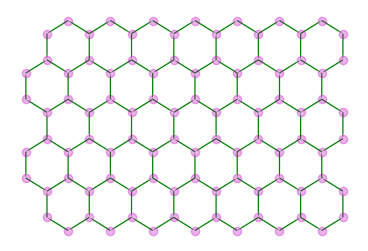

In [ ]:
v_x,regions =unit_hexagons(5,7) # unit hexagon vertices
edge_list,_ = VoronoiRegions2Edges(regions) #get list of edges

# display the graph:
plt.figure(figsize=[4.5,3])
plot_graph_as_quiver(Graph(Vertex(v_x),torch.tensor(edge_list)))
plt.plot(v_x[:,0],v_x[:,1],'mo',alpha=.3)
plt.show()

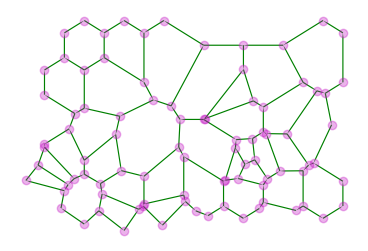

In [ ]:
v_x,regions =generate_lattice(5, 7, p_noise=.5, rng_seed=4242) # unit hexagon vertices
edge_list,_ = VoronoiRegions2Edges(regions) #get list of edges

# display the graph:
plt.figure(figsize=[4.5,3])
plot_graph_as_quiver(Graph(Vertex(v_x),torch.tensor(edge_list)))
plt.plot(v_x[:,0],v_x[:,1],'mo',alpha=.3)
plt.show()

- Use these vertices and Voronoi regions to generate [`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) objects,
- you can use [`VoronoiRegions2Edges`](https://mshagirov.github.io/vertex_simulation/primitives.html#voronoiregions2edges) to convert Voronoi regions into an edge list and corresponding cells required for [`Monolayer`](https://mshagirov.github.io/vertex_simulation/primitives.html#monolayer) initialization.

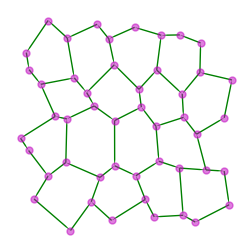

In [ ]:
v_x,regions =unit_hexagons(4, 4)

# add some noise
np.random.seed(42) # RNG seed
v_x += np.random.randn(v_x.shape[0], v_x.shape[1])*.2

# get edges and cells (as a set of edges)
edge_list,cells = VoronoiRegions2Edges(regions) 

# create a Monolayer object from the hexagonal cells
cell_graph = Monolayer(vertices=Vertex(v_x.copy()),
                       edges=torch.tensor(edge_list),
                       cells=cells)

figsize=[3,3]
plt.figure(figsize=figsize)
plot_graph_as_quiver(cell_graph)
plt.plot(cell_graph.vertices.x[:,0].detach().cpu(),
         cell_graph.vertices.x[:,1].detach().cpu(),'mo',ms=5,alpha=.5)
plt.show()